In [1]:
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('winequalityN.csv')

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Statistics

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
data = data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [14]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000         

In [7]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

### Categorical Variables

In [21]:
print("Wine Type Counts:")
print(data["type"].value_counts())

Wine Type Counts:
type
white    4870
red      1593
Name: count, dtype: int64


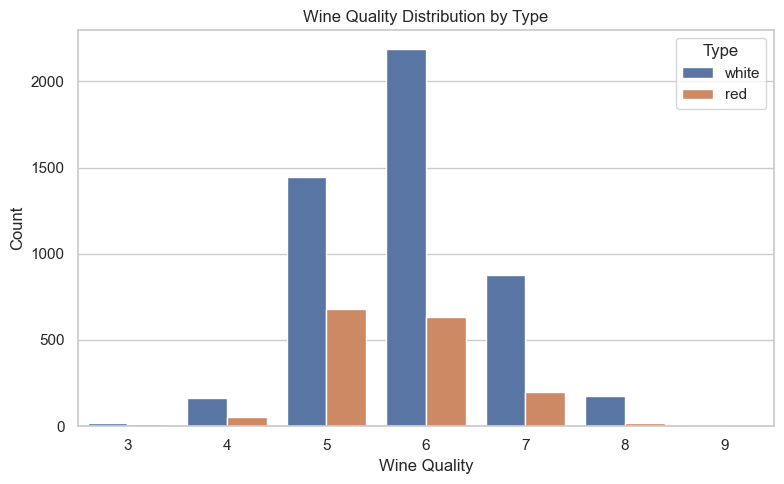

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', hue='type', data=data)
plt.title("Wine Quality Distribution by Type")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

### Numerical Variables

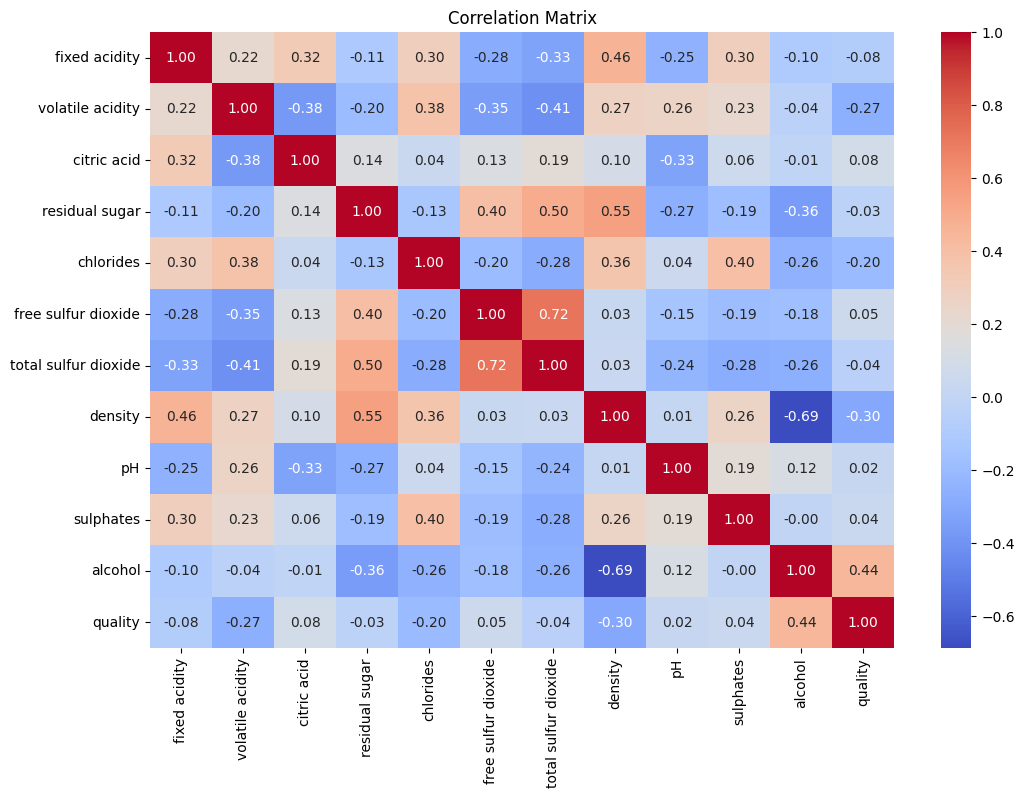

In [12]:
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

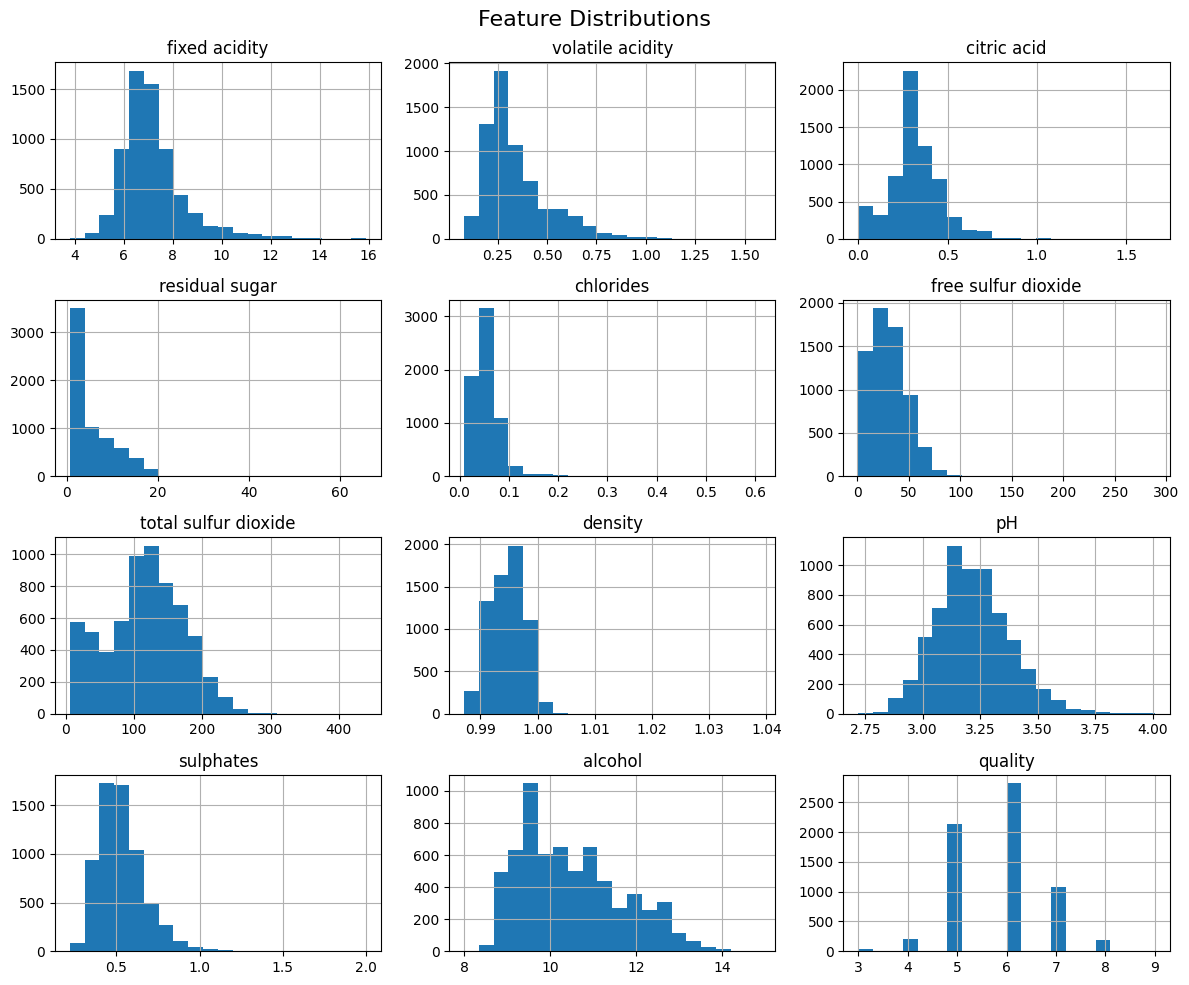

In [17]:
data[numeric_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

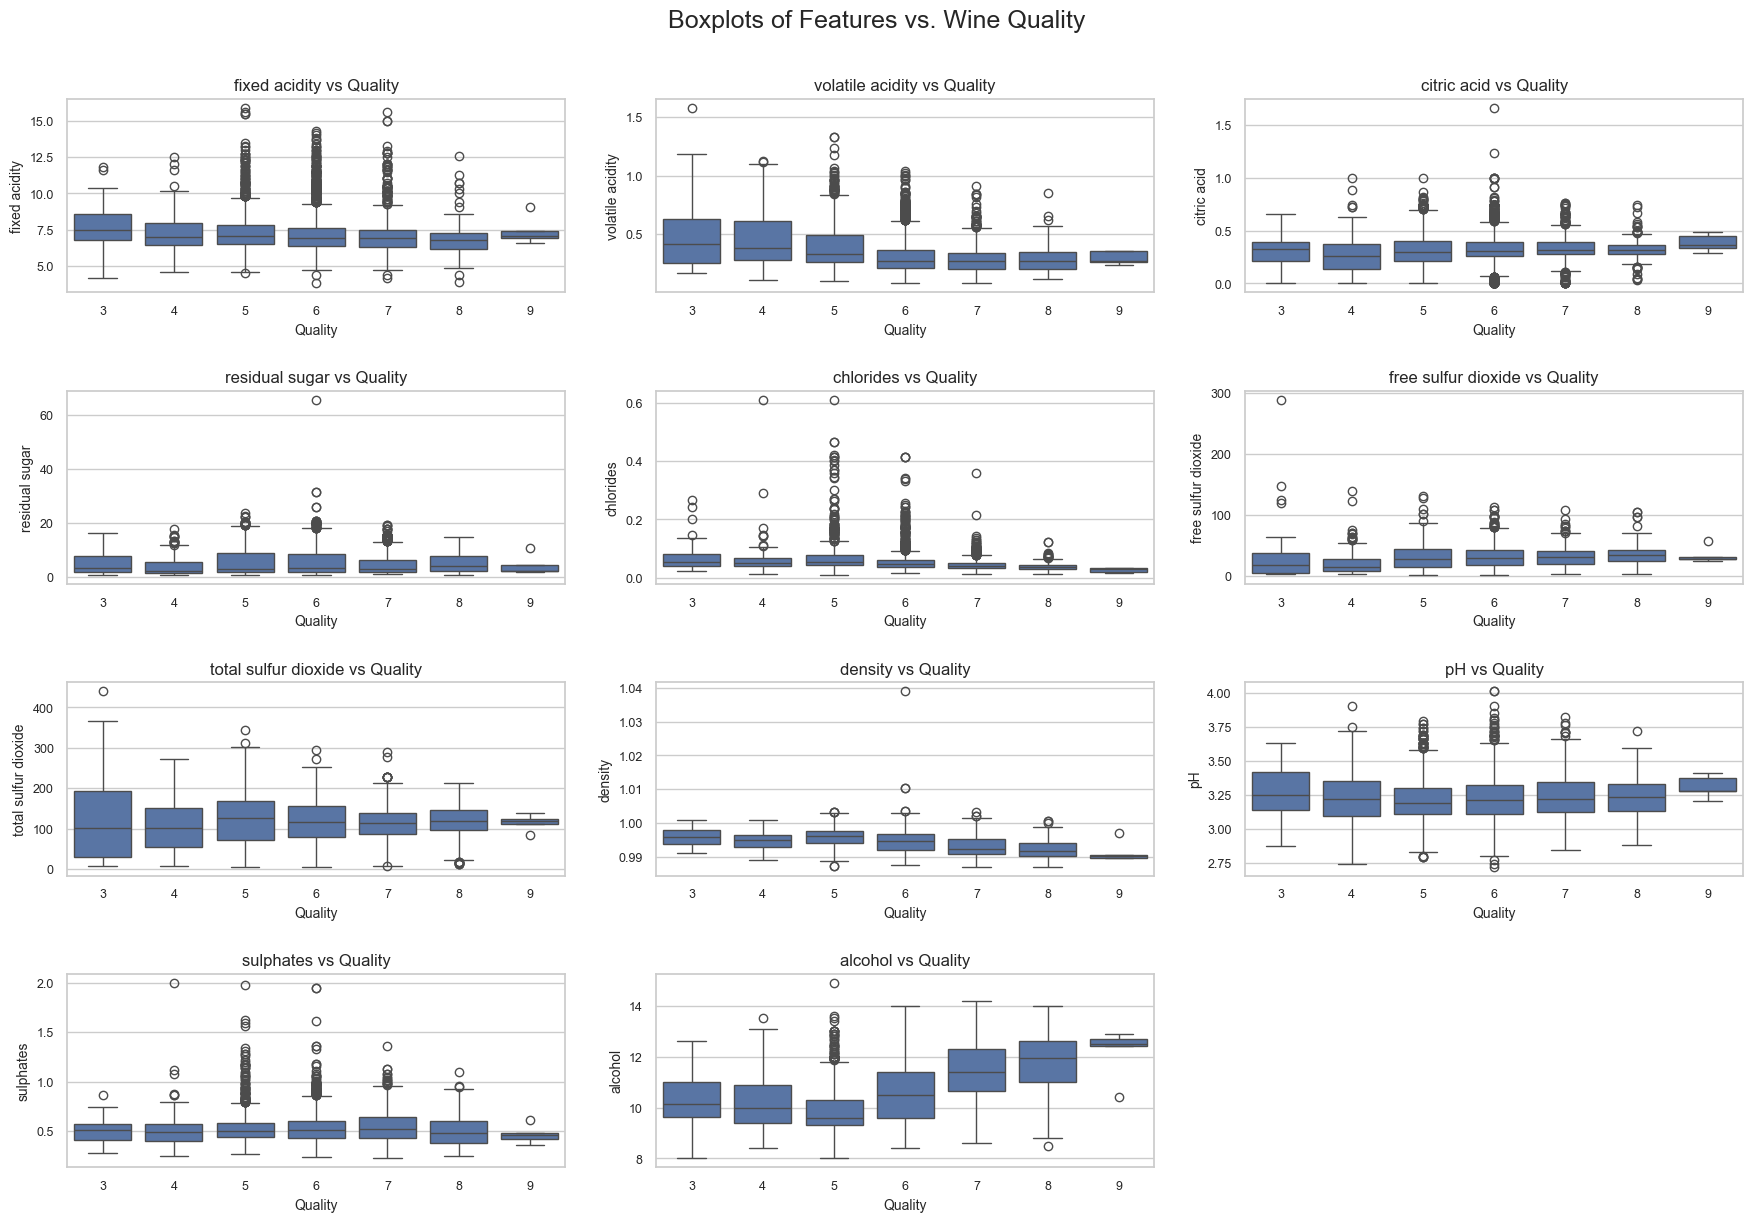

In [20]:
sns.set(style="whitegrid")

features = data.select_dtypes(include='number').drop(columns=['quality']).columns

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'{feature} vs Quality', fontsize=12)
    plt.xlabel("Quality", fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

plt.tight_layout(pad=2.0)
plt.suptitle("Boxplots of Features vs. Wine Quality", fontsize=18, y=1.03)
plt.show()

## AutoML

### FLAML

In [24]:
X = data.drop(columns=["quality"])
y = data["quality"]
X_encoded = pd.get_dummies(X, drop_first=True)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Run FLAML AutoML
automl = AutoML()
automl_settings = {
    "time_budget": 300,  
    "metric": 'accuracy',  
    "task": 'classification', 
    "log_file_name": "flaml.log",
}
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 08-05 16:43:04] {1752} INFO - task = classification
[flaml.automl.logger: 08-05 16:43:04] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 08-05 16:43:04] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 08-05 16:43:04] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 08-05 16:43:04] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-05 16:43:04] {2417} INFO - Estimated sufficient time budget=1936s. Estimated necessary time budget=45s.
[flaml.automl.logger: 08-05 16:43:04] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.4690,	best estimator lgbm's best error=0.4690
[flaml.automl.logger: 08-05 16:43:04] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-05 16:43:04] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.4690,	best estimator lgbm's best error=0.4690
[flaml.automl.logger: 08-05

In [26]:
from sklearn.metrics import classification_report

# Predictions
y_pred = automl.predict(X_val)

# Evaluation
print(classification_report(y_val, y_pred))

# Best model and features
print("Best ML model:", automl.model.estimator)
print("Top features:", automl.model.feature_importances_)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.57      0.08      0.15        48
           5       0.72      0.70      0.71       430
           6       0.62      0.80      0.70       540
           7       0.72      0.51      0.59       228
           8       1.00      0.26      0.42        42
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1293
   macro avg       0.52      0.34      0.37      1293
weighted avg       0.68      0.67      0.65      1293

Best ML model: LGBMClassifier(colsample_bytree=np.float64(0.6235729390918637),
               learning_rate=np.float64(0.05881570800781092), max_bin=127,
               min_child_samples=2, n_estimators=51, n_jobs=-1, num_leaves=2076,
               reg_alpha=0.0009765625,
               reg_lambda=np.float64(1.2758832684781323), verbose=-1)
Top features: [10788  8619 10000  9424 10379 11428 11722  9

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split

# Start H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "24.0.1" 2025-04-15; OpenJDK Runtime Environment Homebrew (build 24.0.1); OpenJDK 64-Bit Server VM Homebrew (build 24.0.1, mixed mode, sharing)
  Starting server from /opt/anaconda3/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/wf/0668v_px5kx7nydtwd0r429r0000gn/T/tmprreucgvu
  JVM stdout: /var/folders/wf/0668v_px5kx7nydtwd0r429r0000gn/T/tmprreucgvu/h2o_sijiehuang_started_from_python.out
  JVM stderr: /var/folders/wf/0668v_px5kx7nydtwd0r429r0000gn/T/tmprreucgvu/h2o_sijiehuang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_sijiehuang_3q7yjz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.983 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [28]:
hf = h2o.H2OFrame(data)

# Set categorical columns
hf['type'] = hf['type'].asfactor() 
hf['quality'] = hf['quality'].asfactor() 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
train, test = hf.split_frame(ratios=[0.8], seed=42)

In [30]:
target = 'quality'
features = [col for col in hf.columns if col != target]

# Run AutoML
aml = H2OAutoML(max_runtime_secs=300, 
                seed=42,
                balance_classes=True,
                sort_metric="mean_per_class_error")

aml.train(x=features, y=target, training_frame=train)

AutoML progress: |
16:53:35.574: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),43/43
# GBM base models (used / total),32/32
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),8/8
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [31]:
# View leaderboard
lb = aml.leaderboard
print(lb.head(rows=5))

# Predict on test set
preds = aml.leader.predict(test)

# Evaluate performance
perf = aml.leader.model_performance(test_data=test)
print(perf)

model_id                                                   mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_3_AutoML_1_20250805_165335                   0.636627   0.824559  0.517866  0.268185
StackedEnsemble_BestOfFamily_4_AutoML_1_20250805_165335                0.639364   0.808239  0.514972  0.265197
StackedEnsemble_AllModels_1_AutoML_1_20250805_165335                   0.645576   0.80925   0.515489  0.265729
StackedEnsemble_BestOfFamily_3_AutoML_1_20250805_165335                0.645611   0.810254  0.515847  0.266098
StackedEnsemble_AllModels_2_AutoML_1_20250805_165335                   0.645885   0.808781  0.514684  0.264899
[5 rows x 5 columns]

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.25573932202799726
RMSE: 0.5057067549756452
LogLoss: 0.7941163066406173
Null degrees of freedom: 1287
Residual degrees of freedom: 645
Nu